# Foundations of Machine Learning EE298
## Assignment No. 2 : Backpropagation
### Edwin Klein S. Balila

In [55]:
#load libraries
import numpy as np
from matplotlib import pyplot as plt
from math import pi
import random

In [119]:
#Define PDF function
def NormalPdf(inp, mean, stand):
    firstterm = 1/(np.sqrt(2*pi*(std**2)))
    secondterm = np.exp(-((inp-mean)**2)/(2*(std**2)))
    out = firstterm*secondterm
    return out


### Supply the mean and standard deviation of 1D Gaussian

In [347]:
mean = float(input("Enter desired mean: "))
std = float(input("Enter desired std: "))

Enter desired mean: 0
Enter desired std: 1


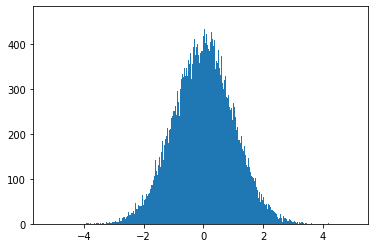

In [348]:
# generate random Gaussian values
from random import seed
from random import gauss
# seed random number generator
seed(1)
values = [] # declare container of gaussian values
# generate some Gaussian values
for _ in range(1000000):
    values.append(gauss(mean,std))
    
# display plot
plt.hist(values, bins = 10000)
plt.show()

In [349]:
print("Check Mean:", np.mean(values))
print("Check STD:", np.std(values))

Check Mean: -0.00023916277759317806
Check STD: 1.0004030866024871


### Create Sample

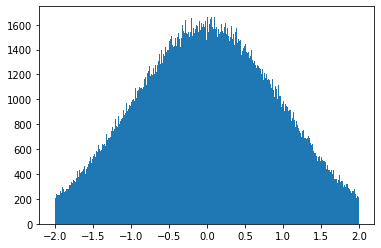

In [350]:
# limit our values between two stds
X = [x for x in values if abs(x)<=2*std]

plt.hist(X, bins=1000)
plt.show()

1000


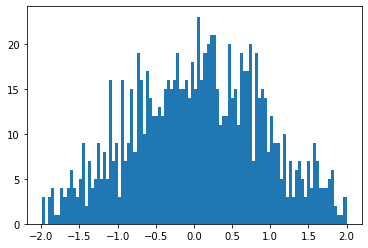

In [351]:
# select 1000 samples
data = np.random.choice(X, 1000)
print(len(data))

# display plot
plt.hist(data, bins=100)
plt.show()

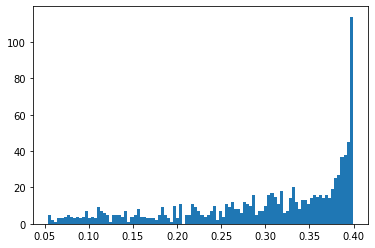

In [352]:
from collections import Counter

counter = Counter(data)
pmf = NormalPdf(data, mean, std)

plt.hist(pmf, bins=100)
plt.show()

In [353]:
#data

In [354]:
#pmf

### Train, test, split

In [355]:
# to split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(data, pmf, test_size = 0.1, train_size = 0.9, random_state=0 )

### Define Functions for Neural Network

In [356]:
#reLU function
def relu(X):
   return np.maximum(0.0,X)
#reLU function derivative
def reLuP(X):
    # derivative of the ReLU
    X[X <= 0] = 0
    X[X >  0] = 1    
    return X

#sigmoid function
def nonlin(x):
    return 1/(1+np.exp(-x))
#sigmoid funtion derivative
def sigmoid_derivative(x):
        #computing derivative to the Sigmoid function
        return x * (1 - x)

# Create Training Model

In [357]:
random.seed(0)

x = X_train.reshape(len(X_train),1)
y = y_train.reshape(len(y_train),1).T

gamma=0.1 # Learning Rate

# initialize weights randomly with mean 0 and standard deviation 0.01
w0 = []
w1 = []
w2 = []

for _ in range(64):
    w0.append(gauss(0,0.01))
    w2.append(gauss(0,0.01))

for _ in range(64*64):
    w1.append(gauss(0,0.01))

# reshape for dot product
w0 = np.array(w0).reshape(-1,1).T
w1 = np.array(w1).reshape(64,64)
w2 = np.array(w2).reshape(-1,1)


### Perform Forward Propagation and Backward Propagation

In [358]:
from sklearn.metrics import mean_squared_error

Epochs = 20
for iter in range(20):
    # forward propagation
    layer0 = x
    layer1 = relu(np.dot(layer0,w0))
    layer2 = relu(np.dot(layer1,w1))
    layer3 = nonlin(np.dot(layer2,w2))

            
    # Backpropagation
    # Mean Square Error
    outLayer_error = np.square(y - layer3)
    

    MSE = mean_squared_error(y_train, layer3)
    
    print("Epoch",iter+1,"MSE:", MSE)
    
    layer3_delta = outLayer_error.dot(sigmoid_derivative(np.dot(layer2,w2)))
    layer2_delta = layer3_delta.dot(w2.T)*reLuP(np.dot(layer1,w1))
    layer1_delta = layer2_delta.dot(w1.T)*reLuP(np.dot(layer0,w0))
    
    #update the weights
    w2 += gamma*np.dot(layer2.T,layer3_delta)
    w1 += gamma*np.dot(layer1.T,layer2_delta)
    w0 += gamma*np.dot(layer0.T,layer1_delta)

Epoch 1 MSE: 0.04920540582205631
Epoch 2 MSE: 0.04920515562983048
Epoch 3 MSE: 0.04920490693998077
Epoch 4 MSE: 0.04920464100203046
Epoch 5 MSE: 0.049204356284343394
Epoch 6 MSE: 0.049204051058117766
Epoch 7 MSE: 0.04920372336148692
Epoch 8 MSE: 0.04920337095526856
Epoch 9 MSE: 0.04920299503579928
Epoch 10 MSE: 0.04920259676794917
Epoch 11 MSE: 0.04920216701504682
Epoch 12 MSE: 0.04920170123879894
Epoch 13 MSE: 0.04920120320329774
Epoch 14 MSE: 0.04920065861244273
Epoch 15 MSE: 0.0492000682264334
Epoch 16 MSE: 0.04919944757751835
Epoch 17 MSE: 0.04919876335796315
Epoch 18 MSE: 0.04919800555430137
Epoch 19 MSE: 0.049197161480062555
Epoch 20 MSE: 0.049196222879246486


# Testing and Evaluation

In [360]:
x1 = X_test.reshape(len(X_test),1)
y1 = y_test.reshape(len(y_test),1).T

layer0 = x1
layer1 = relu(np.dot(layer0,w0))
layer2 = relu(np.dot(layer1,w1))
layer3 = nonlin(np.dot(layer2,w2))

# Mean Square Error
MSE = mean_squared_error(y_test, layer3)
print("MSE:", MSE)

MSE: 0.05756191293998485
